<a href="https://colab.research.google.com/github/Leerith/Metodos.compartido/blob/main/2_DosMuelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

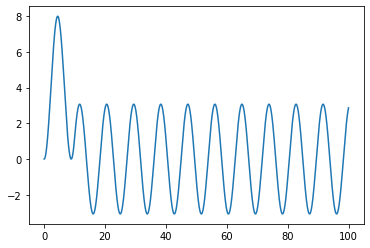

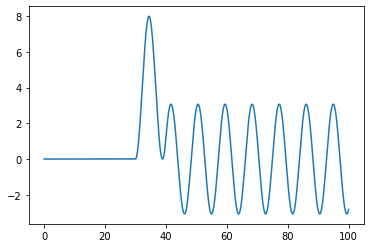

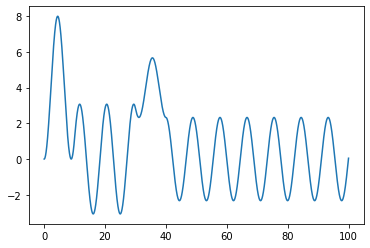

In [ ]:
#El objetivo de esto era comprobar que si tienes dos muelles idénticos, da lo mismo tarle un golpe a uno en t=0 y luego un golpe al otro en t=t'
#y plotear LA SUMA DE LOS DESPLAZAMIENTOS, que dar ambos golpes al mismo muelle y plotear sólo su desplazamiento. Esto se ve directamente de la
#linearidad de la EDO del oscilador armónico, pero puede ser antiintuitivo, porque si das los dos golpes al mismo muelle, cuando das el segundo
#encuentras mas resistencia porque no está en la posición de equilibrio. La cosa es que eso, en neto da igual!
#lo use para entender por qué funciona el Método de Green, en que a cada instante tratas el diferencial de golpe que le das al oscilador
#como si fuera el primero que le das, funciona gracias a esto siempre que el oscilador sea lineal (y,y',y'',... no esten elevadas a algo)


import numpy as np
import matplotlib.pyplot as plt

tmax=100  #defino el tiempo durante el que quiero analizar los movimientos
n=100000  #y el numero de cortes en que lo voy a separar
d=tmax/n  #dt=tiempo que quiero estudiar/numero de cortes

t=0       #Fijio las condiciones iniciales, x1=x2=v1=v2=0 cuando t=0
x1=0
x2=0
v1=0
v2=0
k=2       #Me defino una k que es la FUERZA CONSTANTE que aplico dividida por la masa, NO la k del muelle
w=0.5     #Me defino una frecuencia angular, realmente w es EL CUADRADO de la frecuencia angular, para simplificar

#(puse k y w aleatorios y los fui cambiando hasta que los plots quedaron bonitos)

X=[0]     #Me defino la matriz "suma de desplazamientos", la "desplazamiento del muelle 1", la "desplazamiento del muelle 2"
X1=[0]    #y la "instante de tiempo en el que me encuentro". Todas tienen un sólo elemento 0, que son las condiciones iniciales
X2=[0]    #podría haber puesto x1+x2, x1, x2, t en vez de 0,0,0,0 pero da lo mismo
T=[0]

while t<tmax:   #defino un proceso que dure solo hasta que mi variable tiempo llegue al máximo

#En este tocho, que llamaré bloque 1, haré todas las operaciones que actúan sobre las velocidades

  if t<10:      #defino un "subproceso" que dura solo las primeras 10 unidades de tiempo de las 100 totales: la fuerza actúa sobre el primer muelle
    v1=v1+(k-w*x1)*d  #el proceso es la EDO que siguen los cuerpos en este dt: la velocidad del primero aumenta en Fdt <-> k*d pero disminuye en Kxdt <-> w*x2*d
    v2=v2-w*x2*d      #la velocidad del segundo solo cambia debido a la fuerza de su muelle (con las condiciones iniciales que yo escogí, no cambiará nada pq está en reposo)
  else:         #el "else" cierra este proceso, le dice al programa "y ahora que ya no se cumple la condición, haz..." y entonces pones el siguiente paso
    if 30<t<40: #defino este otro proceso que pasará, entre t=30 y t=40: no pasa inmediatamente después del anterior, aunque en el código si esté justo debajo. Ahora nos encontrarríamos en t=10 <----- 
                #y por tanto el programa saltará a buscar lo que se hace cuando no se da ninguna de las condiciones de los procesos, es decir saltara aquí-----                                        |
      v1=v1-w*x1*d       #                                                                                                                                    |                                        |
      v2=v2+(k-w*x2)*d   #                                                                                                                                    |                                        |
    else:                #  <----------------------------------------------------------------------------------------------------------------------------------                                        |
      v1=v1-w*x1*d       #Aquí el sistema está sometido solamente a sus fuerzas elásticas, y seguira así hasta que se vuelva a dar una condición que exiga lo contrario                                |
      v2=v2-w*x2*d       #(cuando 30<t<40, que volverá a saltar hasta aquí:)----------------------------------------------------------------------------------------------------------------------------

#Lo que hay que entender es que Python lee todo esto en cada paso: while le recuerda que tendrá que releer este bucle cuando lo acabe. Cada vez que lo hace, mirará si aún se cumple la condición principal
#t<tmax. Si lo hace, irá mirando, para el valor de t que tenemos, qué tengo que hacer? - Es mas pequeño que 10? No. => Miro lo siguiente. Está entre 30 y 40? No. => Miro lo siguiente. Vale, lo trato como un oscilador.
#Cuando acaba eso, veréis que hacia el final del bucle cambio el valor de t, hago t->t+dt, y así la próxima vez que se repita el bucle Python comprobará que tiene que hacer con el NUEVO valor de t.

#En el bloque 2, haré que las velocidades actúen sobre las posiciones: x->x+vdt y también haré, ahora que t ya ha actuado sobre todo lo que tiene que actuar, que t avance: t->t+dt

  x1=x1+v1*d
  x2=x2+v2*d
  t=t+d

#La gracia es que el bloque 2 pasa "a la vez" que el Bloque 1, en el sentido de que el programa usa los datos obtenidos por el bloque 1 para el mismo instante de tiempo t+dt.
#Como el bloque 2 NO ESTÁ DENTRO de la condición IF, el programa lleva a cabo esto CADA VEZ que corre el WHILE, independiemente del valor de t
#(porque sea cual sea el régimen, dv siempre es adt, lo que puede cambiar es el valor de a)
#Para saber si algo está dentro de una condición, o "entorno", mirad la indentación. Está dentro del entorno si y sólo si la línea empieza un poco más a la derecha.

#En este último bloque 3, añado los valores que he obtenido para las distintas variables a las matrices en las que los estoy guardando. A mí me gusta usar siempre mayúsculas para las matrices y minúsculas para
#las variables, pero eso va a gustos. Hay gente que simplemente añade _matrix o _array despues del nombre de la variable. Yo soy muy vaga.

  X.append(x1+x2)
  X1.append(x1)
  X2.append(x2)
  T.append(t)

#En lo que viene aquí debajo, vemos por la indentación que ya no estamos en el while: el programa sólo llegará aquí cuando la condición del WHILE ya haya terminado.
#Lo único que hago es pedirle al programa que me enseñe las gráficas con T en la horizontal y X1,X2, y X1+X2 en la vertical.
#ES IMPORTANTE CONOCER SIEMPRE LOS PAQUETES QUE UTILIZAS, ESTO NO SE PUEDE HACE SIN MATPLOTLIB

plt.plot(T,X1)
plt.show()

plt.plot(T,X2)
plt.show()

plt.plot(T,X)
plt.show()

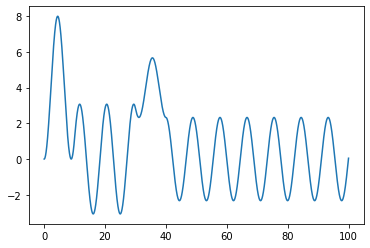

In [ ]:
#Este os dejo que os lo miréis vosotros sabiendo lo que sabéis del anterior. Este es más sencillo, este es el caso en el que SÓLO ME FIJO EN UN MUELLE (lo llamo Y para distinguir)
#En este caso la fuerza k actúa las dos veces sobre el mismo muelle (igual que antes, en 0<t<10 y en 30<t<40), recordemos que el objetivo era comparar la gráfica de este con la gráfica suma del anterior.
#Si corréis los dos programas, deberíais ver que la tercera gráfica del anterior es igual que la de este, si no me he cargado el programa.

t=0
y=0
v=0

Y=[0]
T=[0]

while t<tmax:
  if t<10:
    v=v+(k-w*y)*d
  else:
    if 30<t<40:
      v=v+(k-w*y)*d
    else:
      v=v-w*y*d
  y=y+v*d
  t=t+d
  Y.append(y)
  T.append(t)

plt.plot(T,Y)
plt.show()